# Simulate Discrete Policy + Graph Results

Discrete Policy:  
If hand >= 18: player stands.  
Else: Player hits.

**Implement Discrete Policy by defining what player should do on their turn.**

In [8]:
def very_simple_policy(player_hand, deck):
    player_value = player_eval(player_hand)
    
    # Implement Discrete Policy
    # If hand >= 18, stand. Otherwise, hit.
    while player_value < 18:
        # hit
        player_hand.append(deck.deal())
        player_value = player_eval(player_hand)
        
    return player_value, player_hand, deck

## Run 100,000 games with just 1 round in each to approximate average gain/loss per round.

**Run Simulations.**

In [15]:
results = {}

num_rds = 1
num_games = 100000

net_avg = 0

for i in range(num_games):
    net_avg += play_game(very_simple_policy, num_rounds = num_rds)
net_avg /= num_games

results[num_games] = net_avg

**Graph the results.**

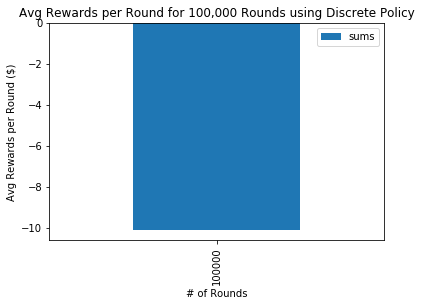

In [17]:
# Load rewards to a df
# x-axis will be # of games played. Not really an x-axis b/c there is just one value
# y-axis will the avg gains/losses for any given round using Discrete Policy
df = pd.DataFrame(list(results.values()), columns = ["sums"], index = results.keys())

# sort by index align x/y axis properly
df.sort_index(inplace=True)

df.plot.bar()

plt.xlabel("# of Rounds")
plt.ylabel("Avg Rewards per Round ($)")
plt.title("Avg Rewards per Round for 100,000 Rounds using Discrete Policy")

plt.show()